In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:

import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import pandas as pd
import os

root = "/content/drive/MyDrive/FraudBehaviorEmbeddings"
X = np.load(os.path.join(root, "data/processed/compressed_embeddings.npy"))

USE ISOLATION TREE FOREST

In [ ]:
#  train Isolation Forest
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(X)

# Predict anomaly scores
anomaly_scores = model.decision_function(X)  # Higher score means less anomalous
# print(anomaly_scores)
predictions = model.predict(X)  # -1 for anomaly, 1 for normal
# print(predictions)

In [ ]:
# Save anomaly scores + predictions
# Let, node index == user index
results_df = pd.DataFrame({
    "user_id": [f"user_{i}" for i in range(len(X))],
    "anomaly_score": anomaly_scores,
    "is_anomalous": predictions
})
# print(results_df)
results_df.to_csv(os.path.join(root, "data/processed/anomaly_scores.csv"), index=False)

print(" Anomaly detection results saved!")


 Anomaly detection results saved!


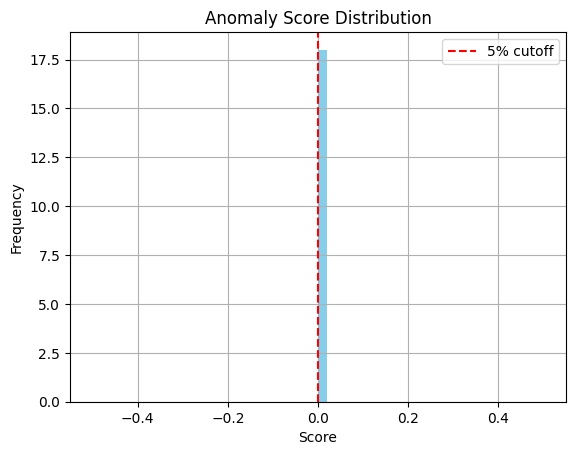

In [ ]:
# Visualize anomaly score distribution
plt.hist(anomaly_scores, bins=50, color='skyblue')
plt.axvline(x=np.percentile(anomaly_scores, 1), color='red', linestyle='--', label='5% cutoff')
plt.title("Anomaly Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()
